In [53]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv('C:\\Users\\Kasheef_Alee\\Desktop\\dataset.csv')

In [5]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
print(dataset.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


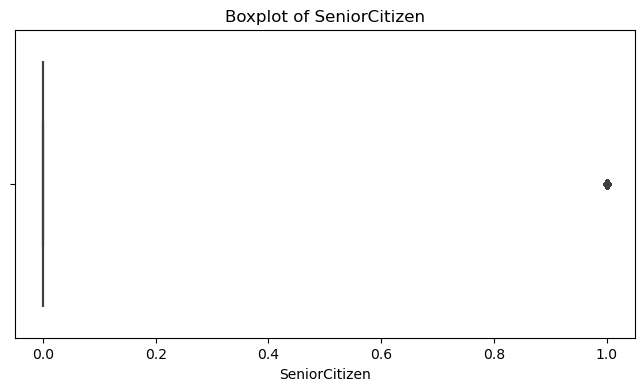

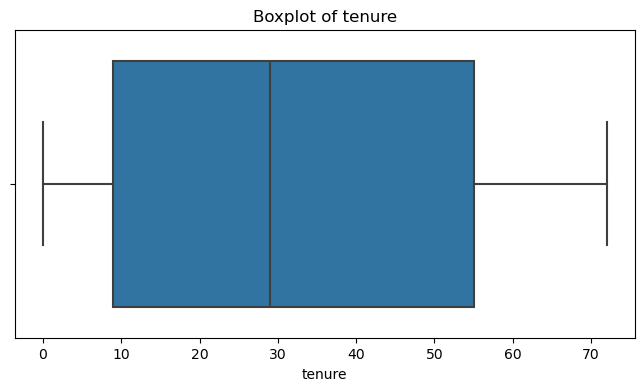

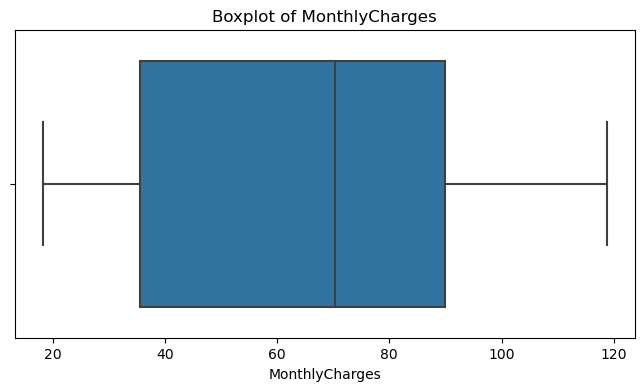

In [20]:
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

for feature in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

z_scores = stats.zscore(dataset[numeric_columns])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = dataset[filtered_entries]

In [23]:

dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'].str.strip(), errors='coerce')
dataset['TotalCharges'].fillna(dataset['TotalCharges'].median(), inplace=True)
print(dataset['TotalCharges'].head())
scaler = StandardScaler()
dataset[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(dataset[['tenure', 'MonthlyCharges', 'TotalCharges']])
print(dataset[['tenure', 'MonthlyCharges', 'TotalCharges']].head())

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64
     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.994242
1  0.066327       -0.259629     -0.173244
2 -1.236724       -0.362660     -0.959674
3  0.514251       -0.746535     -0.194766
4 -1.236724        0.197365     -0.940470


In [25]:
numeric_df = dataset.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

print(correlation_matrix)


                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102652
tenure               0.016567  1.000000        0.247900      0.825464
MonthlyCharges       0.220173  0.247900        1.000000      0.650864
TotalCharges         0.102652  0.825464        0.650864      1.000000


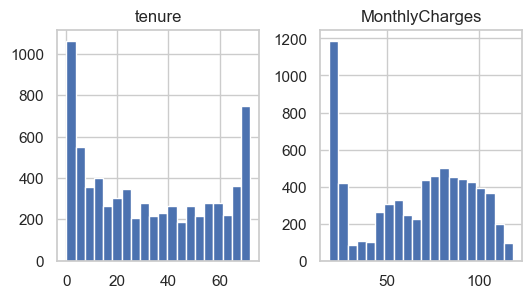

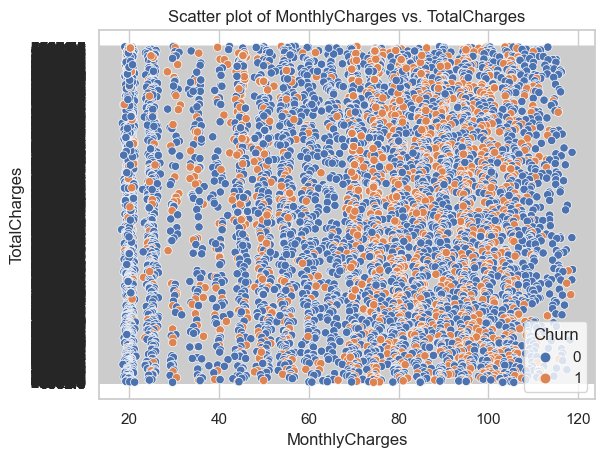

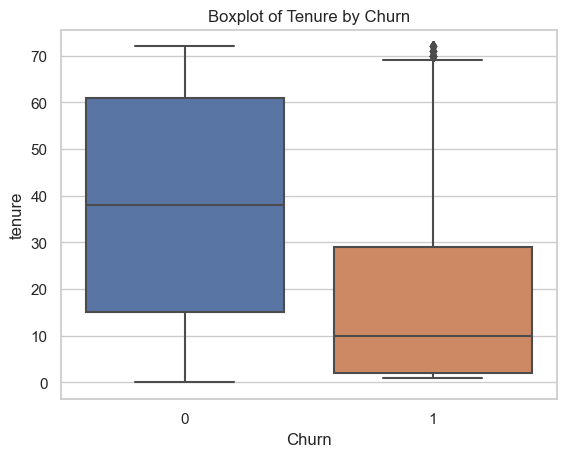

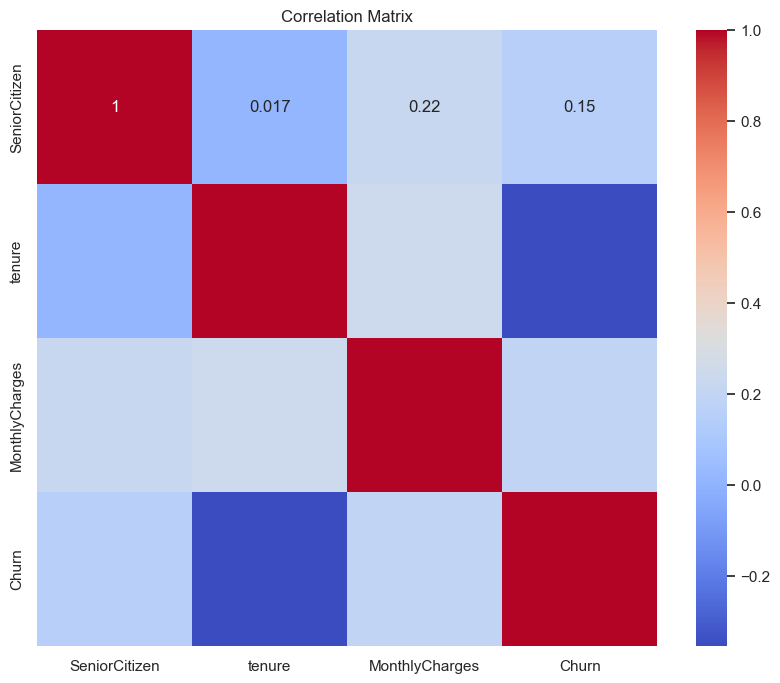

In [62]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=20, figsize=(6, 3))
plt.show()

sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title('Scatter plot of MonthlyCharges vs. TotalCharges')
plt.show()

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Boxplot of Tenure by Churn')
plt.show()

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()                                                                                  


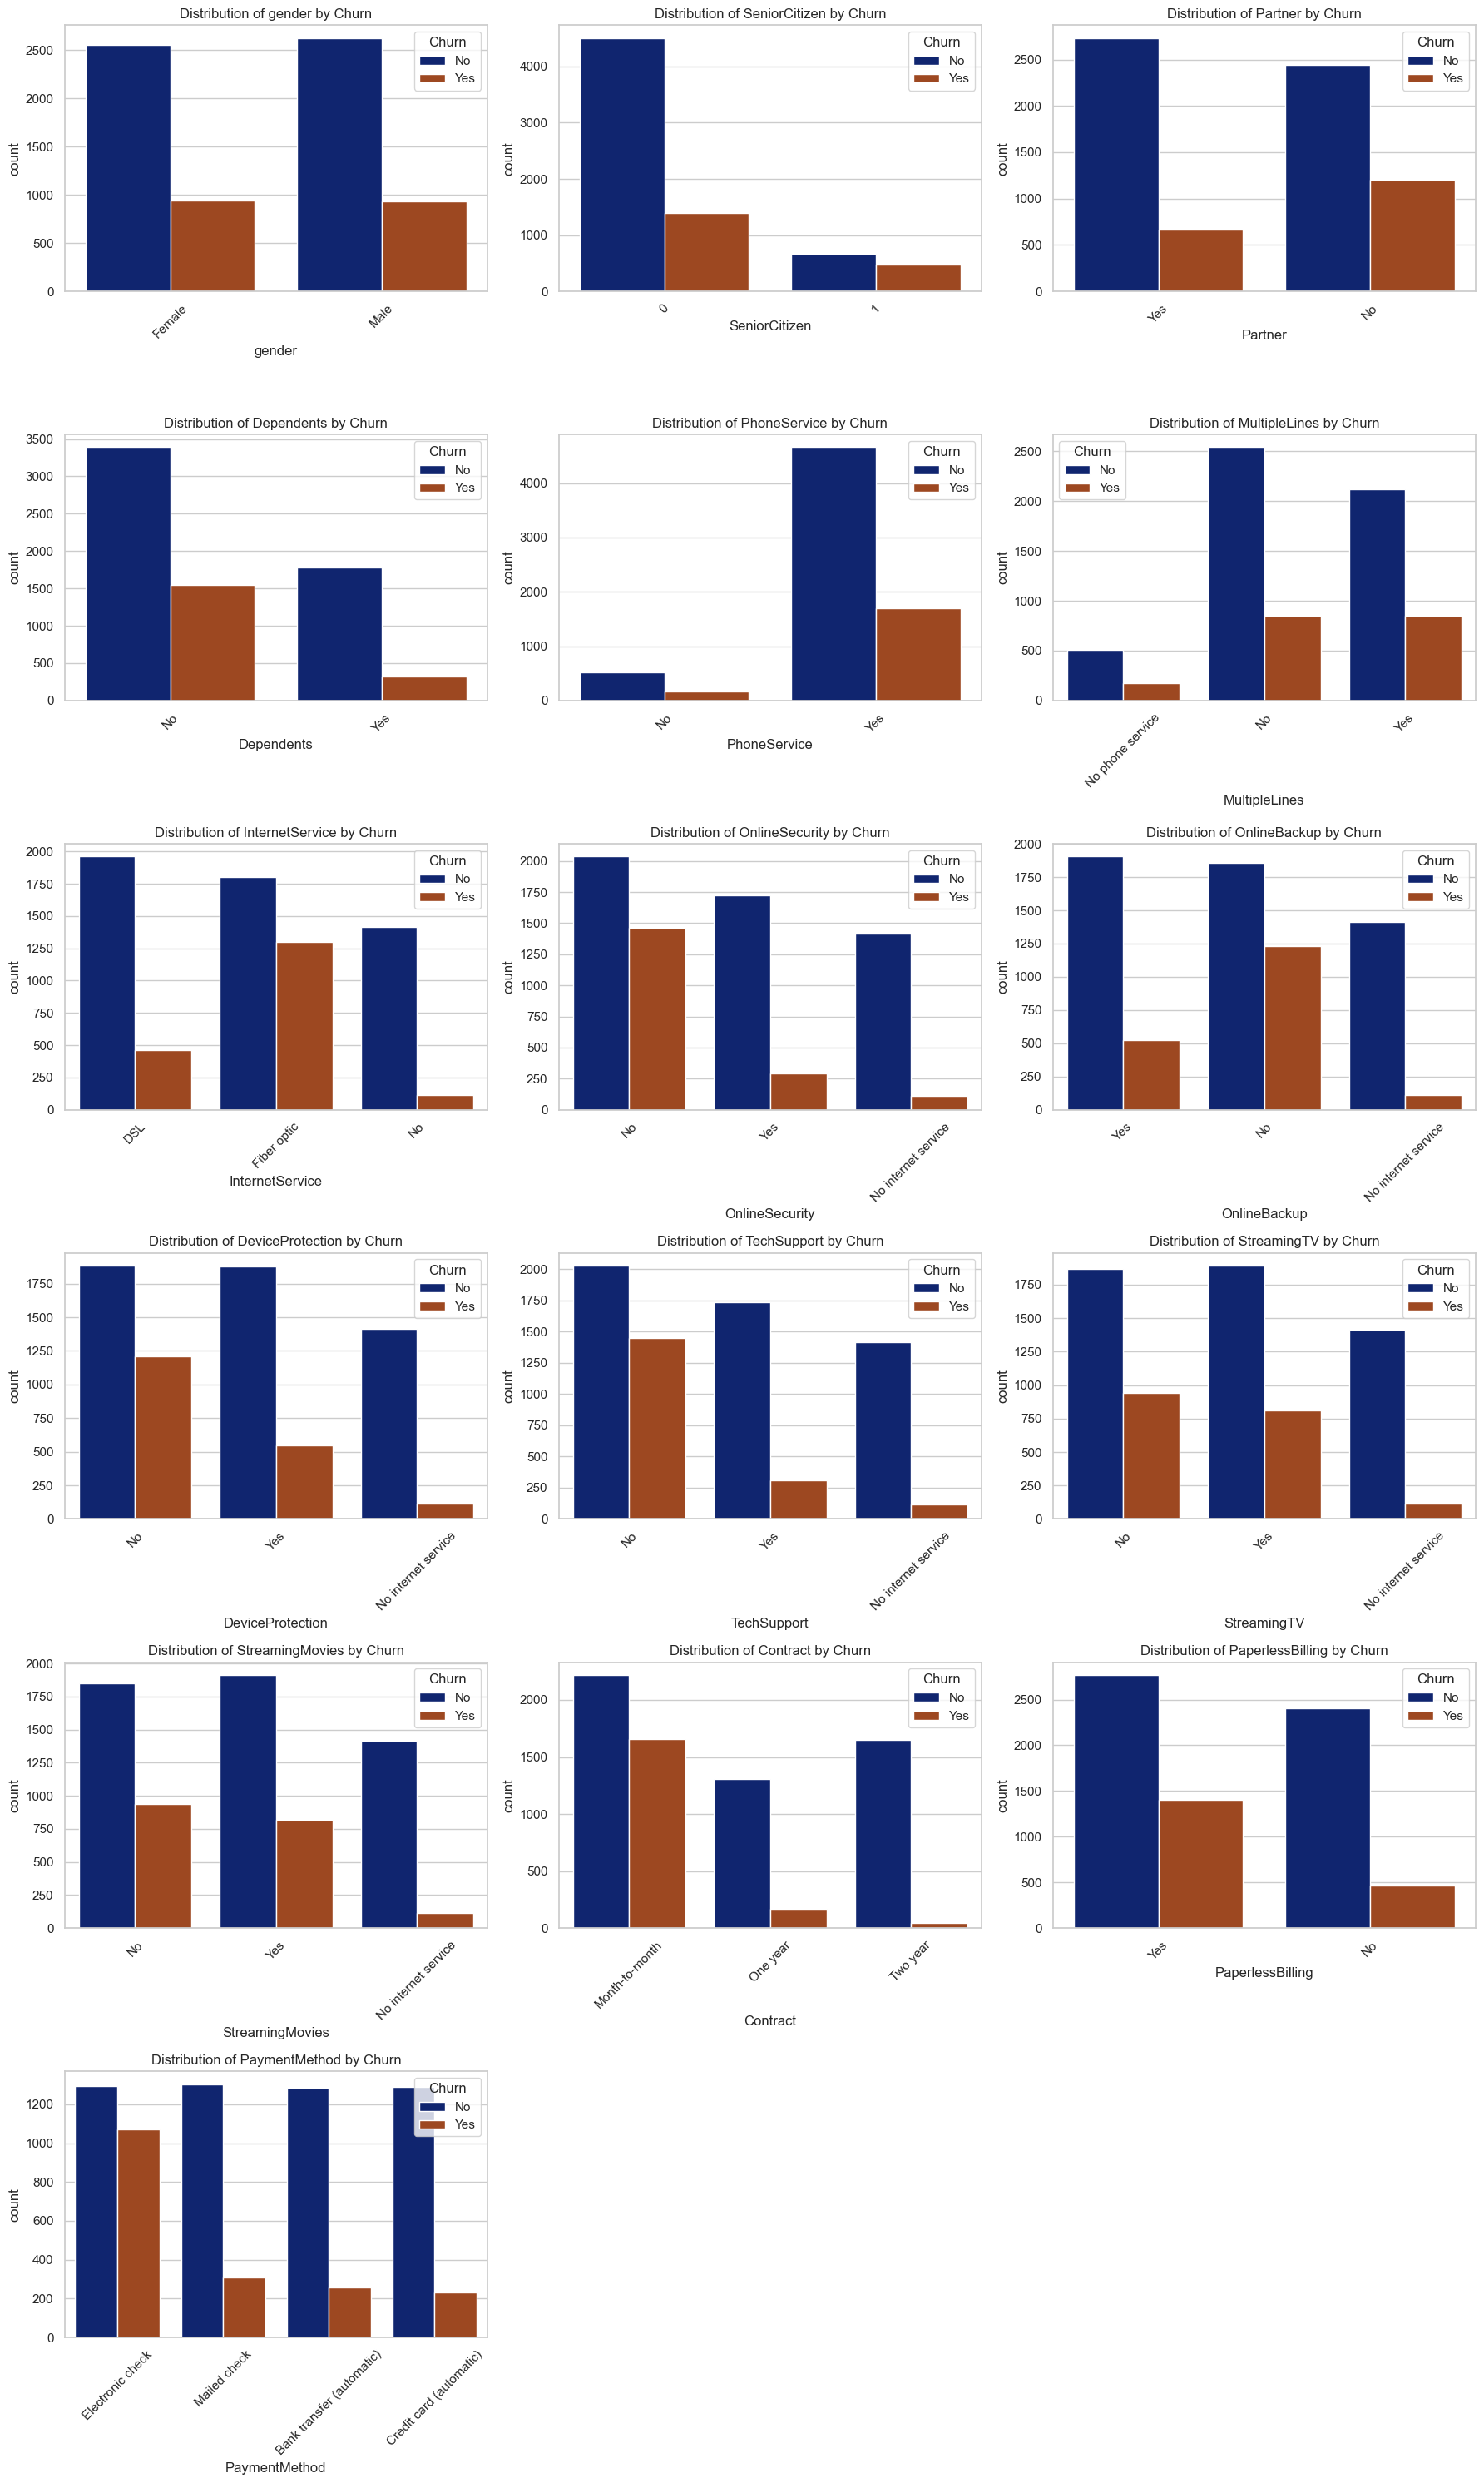

In [33]:

sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("dark")
num_predictors = len(dataset.drop(columns=['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']).columns)

n_cols = 3  
n_rows = math.ceil(num_predictors / n_cols) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5)) 
axes = axes.flatten()  

for i, predictor in enumerate(dataset.drop(columns=['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])):
    sns.countplot(data=df, x=predictor, hue='Churn', palette=custom_palette, ax=axes[i])
    axes[i].set_title(f'Distribution of {predictor} by Churn')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [39]:
dataset['Churn']=dataset['Churn'].map({'Yes':1, 'No':0})

In [40]:
dataset.drop(columns=['customerID','tenure'], inplace=True)

In [41]:

new_df = pd.get_dummies(dataset)

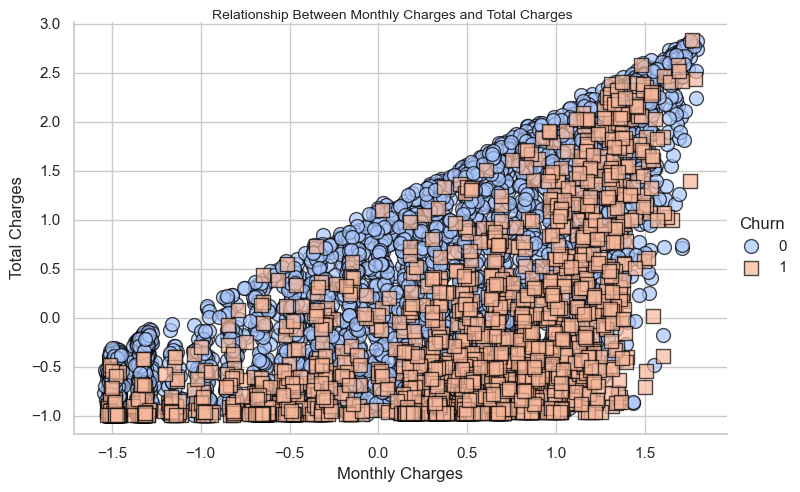

In [61]:
sns.set_style("whitegrid")

plot = sns.lmplot(
    data=new_df,
    x='MonthlyCharges',
    y='TotalCharges',
    fit_reg=False,
    hue='Churn', 
    palette='coolwarm', 
    markers=['o', 's'],  
    height=5,  
    aspect=1.5, 
    scatter_kws={'s': 100, 'edgecolor': 'black', 'alpha': 0.7} 
)
plot.set_axis_labels('Monthly Charges', 'Total Charges')
plot.fig.suptitle('Relationship Between Monthly Charges and Total Charges', size=10)
plot.set_titles('')
plt.show()

In [44]:
new_df['MonthlyCharges'].corr(new_df['TotalCharges'])

0.6508643497230397

c:\Users\Kasheef_Alee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kasheef_Alee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


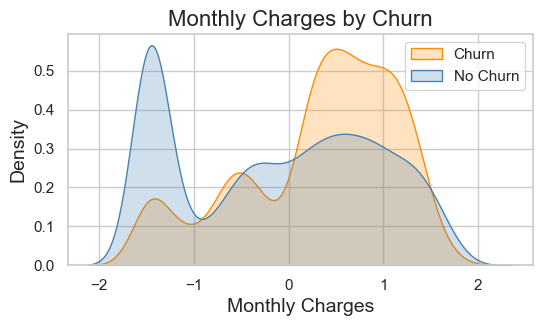

In [56]:
plt.figure(figsize=(6, 3))

sns.kdeplot(
    data=new_df[new_df['Churn'] == 1], 
    x='MonthlyCharges', 
    color='darkorange',  
    fill=True,  
    label='Churn'
)
sns.kdeplot(
    data=new_df[new_df['Churn'] == 0], 
    x='MonthlyCharges', 
    color='steelblue',  
    fill=True,  
    label='No Churn'
)

plt.title('Monthly Charges by Churn', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(loc='upper right')
plt.show()


c:\Users\Kasheef_Alee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kasheef_Alee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


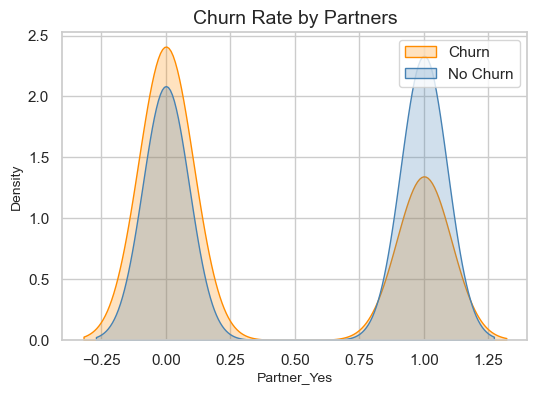

In [58]:
plt.figure(figsize=(6, 4))

sns.kdeplot(
    data=new_df[new_df['Churn'] == 1], 
    x='Partner_Yes', 
    color='darkorange',  
    fill=True,  
    label='Churn'
)
sns.kdeplot(
    data=new_df[new_df['Churn'] == 0], 
    x='Partner_Yes', 
    color='steelblue',  
    fill=True,  
    label='No Churn'
)

plt.title('Churn Rate by Partners', fontsize=14)
plt.xlabel('Partner_Yes', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend(loc='upper right')
plt.show()


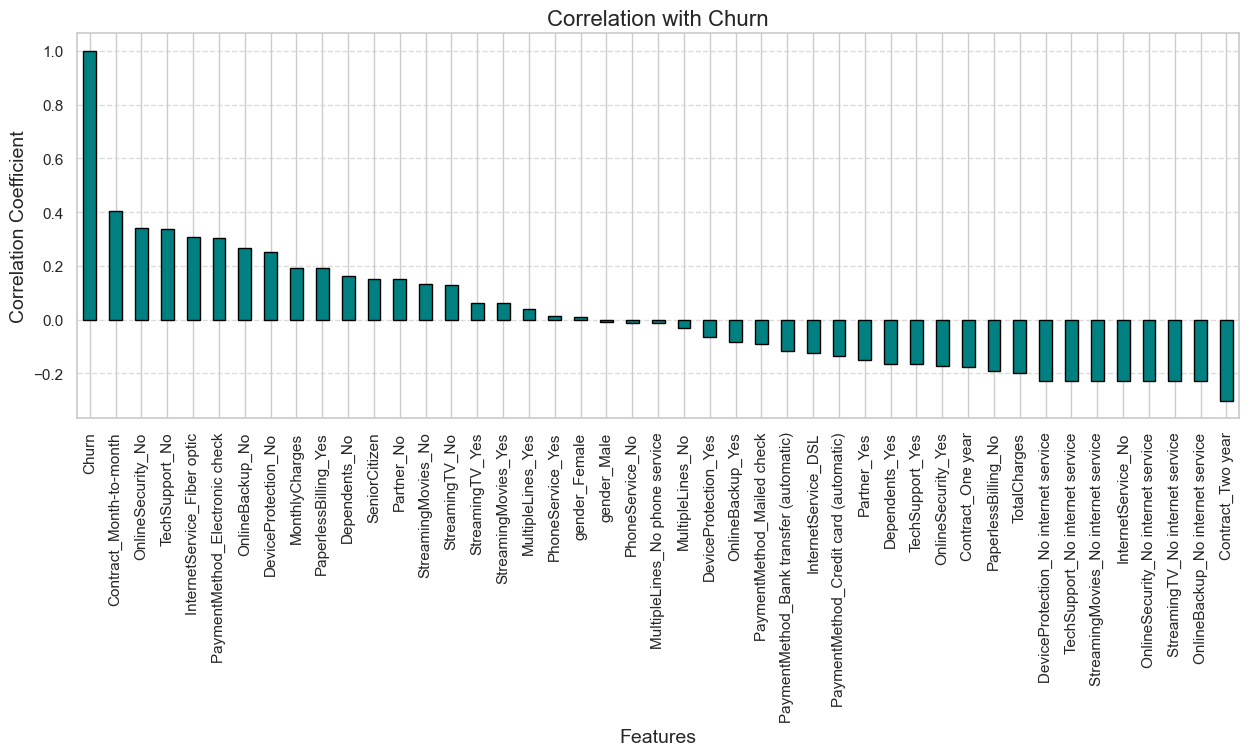

In [52]:
plt.figure(figsize=(15, 5))

correlations = new_df.corr()['Churn'].sort_values(ascending=False)
correlations.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Correlation with Churn', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
